**Проект: использование средств Python для расчёта и визуализации статистических свойств выборки**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

Выборка — задача многоклассовой классификации [ирисов Фишера](https://).

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
dataset = iris['data']

In [4]:
target = iris['target']

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

sepal_length - длина чашелистика  
sepal_width - ширина чашелистика  
petal_length - длина лепестка  
petal_width - ширина лепестка

1. Посчитать основные характеристики выборки по каждому признаку:
- среднее;
- дисперсия;
- минимум;
- максимум;
- размах.

In [7]:
import numpy as np

In [8]:
print("Признак\t\t\tСреднее Дисперсия Минимум Максимум Размах")
for i, name in enumerate(iris.feature_names):
    print(f"{name:18}:", end='\t')
    print(f"{round(dataset[:,i].mean(), 2):5}", end='\t')
    print(f"{round(dataset[:,i].var(), 2):6}", end='\t')
    print(f"{round(dataset[:,i].min(), 2):7}", end='\t')
    print(f"{round(dataset[:,i].max(), 2):7}", end='\t')
    print(f"{round(dataset[:,i].ptp(), 2):8}", end='\n')

Признак			Среднее Дисперсия Минимум Максимум Размах
sepal length (cm) :	 5.84	  0.68	    4.3	    7.9	     3.6
sepal width (cm)  :	 3.06	  0.19	    2.0	    4.4	     2.4
petal length (cm) :	 3.76	   3.1	    1.0	    6.9	     5.9
petal width (cm)  :	  1.2	  0.58	    0.1	    2.5	     2.4


2. Визуализировать распределения признаков посредством seaborn.

In [9]:
import seaborn as sns
sns.set()

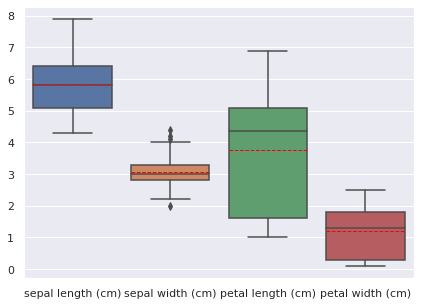

In [10]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=dataset, showmeans=True, meanline=True, meanprops={"color": "red"})
ax.set_xticklabels(iris.feature_names);

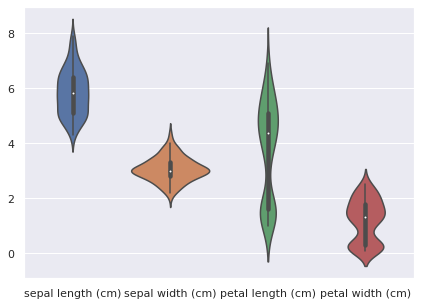

In [11]:
plt.figure(figsize=(7, 5))
ax = sns.violinplot(data=dataset)
ax.set_xticklabels(iris.feature_names);

3. Посчитать и визуализировать корреляционную матрицу.

In [12]:
import pandas as pd

In [13]:
data = pd.concat([pd.DataFrame(dataset, columns=iris.feature_names),
                  pd.DataFrame(target, columns=['class'])], axis=1)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


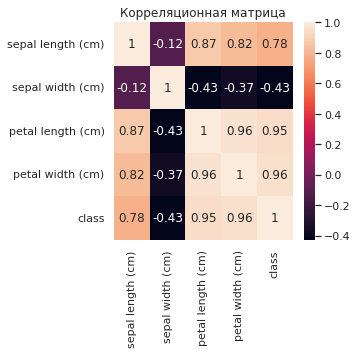

In [14]:
plt.figure(figsize=(4, 4))
sns.heatmap(data.corr(), annot=True)
plt.title("Корреляционная матрица");

In [15]:
data = pd.concat([pd.DataFrame(dataset, columns=iris.feature_names),
                  pd.DataFrame(iris.target_names[target], columns=['class'])], axis=1)

In [16]:
# количество выборок для каждого вида ирисов
data['class'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: class, dtype: int64

In [17]:
# пропущенные значения
pd.isnull(data).sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

4. Проверить гипотезу о нормальности распределения для признаков 1 и 2.

In [18]:
from scipy import stats

In [19]:
def test_normality(x, alpha=0.05):
    """Проверка гипотезы о нормальности распределения с помощью критерия Шапиро-Уилка."""
    statistic, pvalue = stats.shapiro(x)
    print(f"Shapiro: {statistic=}, {pvalue=}")
    return pvalue > alpha

In [20]:
test_normality(dataset[:,0])

Shapiro: statistic=0.9760897755622864, pvalue=0.01017984002828598


False

In [21]:
test_normality(dataset[:,1])

Shapiro: statistic=0.9849170446395874, pvalue=0.10113201290369034


True

5. Произвести расчёт статистик из пункта 1 для каждого значения таргета (группировка).

In [22]:
data.groupby('class').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [23]:
data.groupby('class').var()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [24]:
data.groupby('class').min()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [25]:
data.groupby('class').max()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [26]:
data.groupby('class').agg(np.ptp)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
setosa,1.5,2.1,0.9,0.5
versicolor,2.1,1.4,2.1,0.8
virginica,3.0,1.6,2.4,1.1


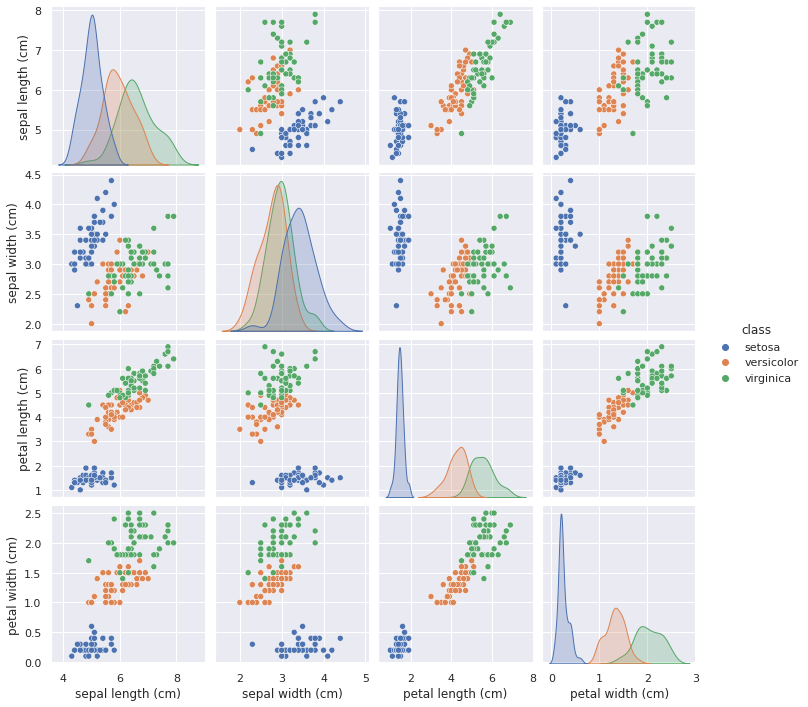

In [27]:
# диаграмма рассеяния ирисов
sns.pairplot(data, hue='class', size=2.5);

6. Написать функцию, автоматизирующую EDA.

In [28]:
def EDA_auto(x, y, feature_names):
    print("Основные характеристики выборки по каждому признаку")
    print("Признак\t\t\tСреднее Дисперсия Минимум Максимум Размах")
    for i, name in enumerate(feature_names):
        print(f"{name:18}:", end='\t')
        print(f"{round(x[:,i].mean(), 2):5}", end='\t')
        print(f"{round(x[:,i].var(), 2):6}", end='\t')
        print(f"{round(x[:,i].min(), 2):7}", end='\t')
        print(f"{round(x[:,i].max(), 2):7}", end='\t')
        print(f"{round(x[:,i].ptp(), 2):8}", end='\n')
    print(f"{'='*80}")
    plt.figure()
    ax = sns.boxplot(data=x, showmeans=True, meanline=True, meanprops={"color": "red"})
    ax.set_xticklabels(feature_names)
    plt.figure()
    ax = sns.violinplot(data=x)
    ax.set_xticklabels(feature_names)
    data = pd.concat([pd.DataFrame(x, columns=feature_names), pd.DataFrame(y, columns=['target'])], axis=1)
    plt.figure()
    sns.heatmap(data.corr(), annot=True)
    plt.title("Корреляционная матрица")
    print("Количество выборок для каждого значения таргета")
    print(data['target'].value_counts())
    print(f"{'='*80}")
    print("Пропущенные значения")
    print(pd.isnull(data).sum())
    print(f"{'='*80}")
    # print([test_normality(x[:,i]) for i in range(x.shape[1])])
    print("Расчёт статистик для каждого значения таргета")
    for func in (np.mean, np.var, np.min, np.max, np.ptp):
        print(data.groupby('target').agg(func))
    print(f"{'='*80}")
    plt.figure()
    sns.pairplot(data, hue='target', size=2.5);

Основные характеристики выборки по каждому признаку
Признак			Среднее Дисперсия Минимум Максимум Размах
sepal length (cm) :	 5.84	  0.68	    4.3	    7.9	     3.6
sepal width (cm)  :	 3.06	  0.19	    2.0	    4.4	     2.4
petal length (cm) :	 3.76	   3.1	    1.0	    6.9	     5.9
petal width (cm)  :	  1.2	  0.58	    0.1	    2.5	     2.4
Количество выборок для каждого значения таргета
0    50
1    50
2    50
Name: target, dtype: int64
Пропущенные значения
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Расчёт статистик для каждого значения таргета
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                   5.006             3.428              1.462   
1                   5.936             2.770              4.260   
2                   6.588             2.974              5.552   

        petal width (cm)  
target      

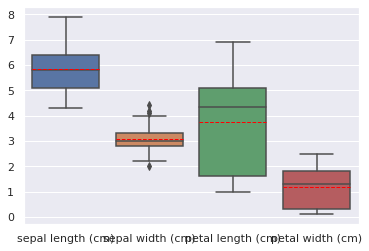

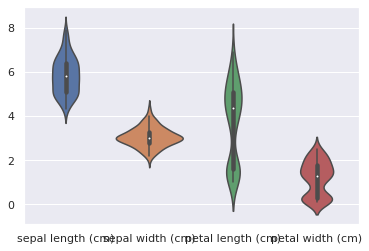

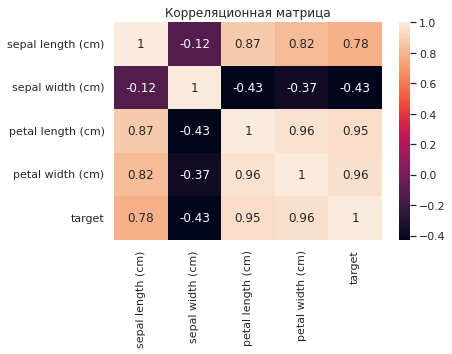

<Figure size 432x288 with 0 Axes>

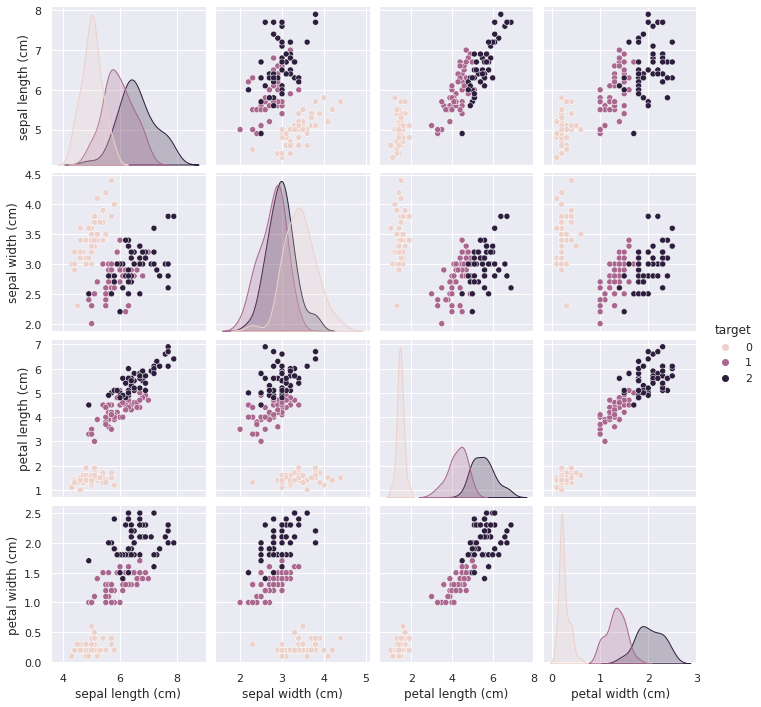

In [29]:
EDA_auto(iris.data, iris.target, iris.feature_names)

7. Описать основные выводы по каждому разделу проекта. Какие выводы можно сделать на основе проведённого анализа?

* Признак *sepal width (cm)* имеет выбросы.
* Признаки *petal length (cm)* и *petal width (cm)* обладают высокой корреляцией с целевой функцией ("Вид ириса").
* **Iris setosa** может быть однозначно опознан на основании значения всего одного признака: *petal length (cm)* либо *petal width (cm)*.
* **Iris versicolor** и **Iris virginica** имеют перекрывающиеся значения в распределениях для всех четырёх признаков, поэтому достоверно отличить эти два вида друг от друга на основании только размеров лепестков и чашелистиков невозможно. 